# Collaborative Filtering

Popular movie recommendation is performed at **weighted_rating.ipynb** and **most_popular_items.ipynb** notebooks. Yet, what if we want to recommend related movies for each movie instead of recommending most popular to everyone? In order to achieve related movie recommendation collaborative filtering algorithm is used. It basically generates similarities between movies with data of movies that are watched by the same person.

Recommendations below will be achieved in this notebook.
1. Item to Item Recommendation
    * Based On Frequency
    * Based On Ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Required for frequency based approach
from itertools import permutations

# Required for ratings based approach
from sklearn.metrics.pairwise import cosine_similarity

# 1. Item to Item Recommendation
## 1.1 Based On Frequency

In [2]:
df_ratings = pd.read_csv('datasets/user_ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [3]:
# Creating the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['main_movie', 'pair_movie'])
  return pairs

In [4]:
# Generating pair_movies for each main movie from every user.
movie_combinations = df_ratings.groupby('userId')['title'].apply(find_movie_pairs)
movie_combinations.head()

main_movie                   pair_movie
userId                                                 
1      0  Toy Story (1995)      Grumpier Old Men (1995)
       1  Toy Story (1995)                  Heat (1995)
       2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
       3  Toy Story (1995)   Usual Suspects, The (1995)
       4  Toy Story (1995)   From Dusk Till Dawn (1996)

In [5]:
# Grouping main and pair movies to calculate frequencies
combination_counts = movie_combinations.groupby(['main_movie', 'pair_movie']).size()
combination_counts.head()

main_movie  pair_movie                                
'71 (2014)  (500) Days of Summer (2009)                   1
            10 Cloverfield Lane (2016)                    1
            127 Hours (2010)                              1
            13 Assassins (Jûsan-nin no shikaku) (2010)    1
            13 Hours (2016)                               1
dtype: int64

In [6]:
# Generating count frequency dataframe 
df_combination_counts = combination_counts.to_frame(name='frequencies').reset_index()
df_combination_counts.sort_values('frequencies', ascending=False, inplace=True)
df_combination_counts.head()

,main_movie,pair_movie,frequencies
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222


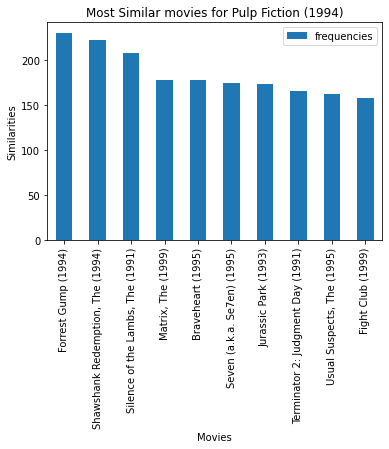

In [7]:
# Most recommendable movies for Pulp Fiction
movie = 'Pulp Fiction (1994)'
df_main_movie = df_combination_counts[df_combination_counts['main_movie'] == movie][:10]
df_main_movie.plot.bar(x='pair_movie');
plt.xlabel('Movies')
plt.ylabel('Similarities')
plt.title(f'Most Similar movies for {movie}');

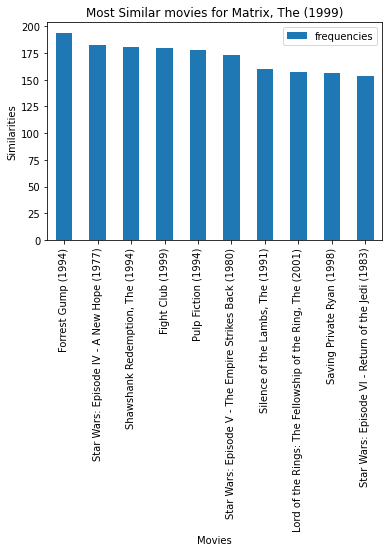

In [8]:
# Most recommendable movies for Matrix
movie = 'Matrix, The (1999)'
df_main_movie = df_combination_counts[df_combination_counts['main_movie'] == movie][:10]
df_main_movie.plot.bar(x='pair_movie')
plt.xlabel('Movies')
plt.ylabel('Similarities')
plt.title(f'Most Similar movies for {movie}');

### Conclusion

In this subsection for each movie related movie recommendation is achieved with frequency based collaborative filtering. However, the problem of if a user liked "Matrix" but not "Pulp Fiction" is not considered. This situation may lead undesired recommendations and on the following subsection this situation will be considered.

## 1.2 Based On Ratings

In [9]:
# Load movies
df_user_ratings = pd.read_csv('datasets/user_ratings.csv')
df_user_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
# Generating pivot table from users, movies and ratings
pivot_user_ratings = df_user_ratings.pivot_table(index='userId',
                                                 columns='title',
                                                 values='rating')
pivot_user_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [11]:
# Checking the data sparsity
pivot_user_ratings.dropna()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,


In [12]:
# Getting average rating for each movie
avg_ratings = pivot_user_ratings.mean(axis=1)

# Subtracting mean ratings from user ratings
pivot_user_ratings_sub = pivot_user_ratings.sub(avg_ratings, axis=0)

# Filling null values with zero
pivot_user_ratings_sub.fillna(0, inplace=True)
pivot_user_ratings_sub

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.366379,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
607,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
608,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,1.365824,0.365824,0.000000,0.000000,0.0


In [13]:
# converting user based movie vectors to movie based user vectors
pivot_movie_ratings = pivot_user_ratings_sub.T

# Based on similarities of differents users similarities are generated
cosine_similarity(pivot_movie_ratings.loc['Matrix, The (1999)', :].values.reshape(1, -1),
                   pivot_movie_ratings.loc['Pulp Fiction (1994)', :].values.reshape(1, -1))[0]

array([0.31362644])

In [14]:
# Generating movie to movie similarity dataframe
df_movie_similarities = pd.DataFrame(cosine_similarity(pivot_movie_ratings),
                                    index=pivot_movie_ratings.index,
                                    columns=pivot_movie_ratings.index)

df_movie_similarities.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.029814,0.0,...,0.0,0.136672,-0.191027,-0.715017,0.0,0.0,-0.303417,-0.618923,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,-0.234086,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,-0.234086,1.000000,0.000000,0.000000,0.0,0.092154,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.861417,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.861417,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [15]:
cosine_similarity_series = df_movie_similarities['Pulp Fiction (1994)']
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)[1:10]
ordered_similarities

title
Usual Suspects, The (1995)          0.458806
Fight Club (1999)                   0.456239
Reservoir Dogs (1992)               0.405111
Godfather, The (1972)               0.395129
Silence of the Lambs, The (1991)    0.389823
Goodfellas (1990)                   0.378742
Shawshank Redemption, The (1994)    0.359471
American History X (1998)           0.352657
Apocalypse Now (1979)               0.344113
Name: Pulp Fiction (1994), dtype: float64

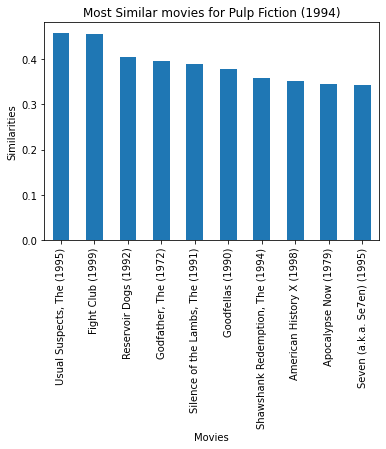

In [16]:
# Getting similarities for "Pulp Fiction"
movie = 'Pulp Fiction (1994)'
cosine_similarity_series = df_movie_similarities[movie]

# Limiting to top 10 similar movies
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)[1:11]

# Plot
ordered_similarities.plot.bar(x='title')
plt.xlabel('Movies')
plt.ylabel('Similarities')
plt.title(f'Most Similar movies for {movie}');

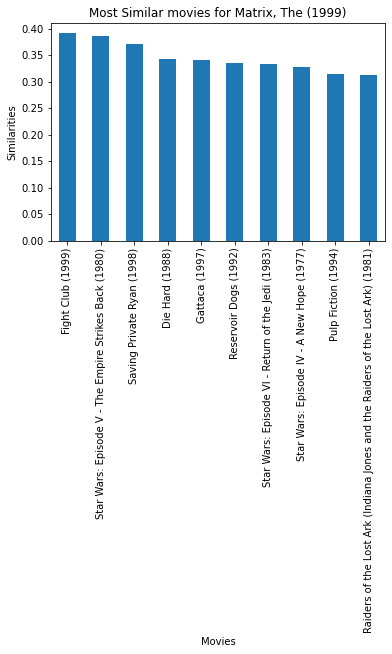

In [17]:
# Getting similarities for "Matrix"
movie = 'Matrix, The (1999)'
cosine_similarity_series = df_movie_similarities[movie]

# Limiting to top 10 similar movies
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)[1:11]

# Plot
ordered_similarities.plot.bar(x='title')
plt.xlabel('Movies')
plt.ylabel('Similarities')
plt.title(f'Most Similar movies for {movie}');

### Conclusion 

When we compare results of "Matrix" and "Pulp Fiction" on both recommendation algorithms which are frequency and rating based we can see that their recommendations differ from each other. The main reason is the frequency based recommendations biased by the popularity of the movie. With considering ratings and average ratings we tried to eliminated popularity bias as much as possible.